In [23]:
import pandas as pd

# Sample customer data
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [19, 21, 20, 23, 31, 22, 35, 40, 52, 60],
    'Annual Income (k$)': [15, 15, 16, 18, 30, 40, 60, 75, 90, 100],
    'Spending Score (1–100)': [39, 81, 6, 77, 40, 75, 50, 60, 48, 20]
}

df = pd.DataFrame(data)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1–100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,18,77
4,5,31,30,40


In [24]:
from sklearn.preprocessing import StandardScaler

# Drop CustomerID
df_clean = df.drop('CustomerID', axis=1)

# Normalize (Standard Scaling)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_clean)

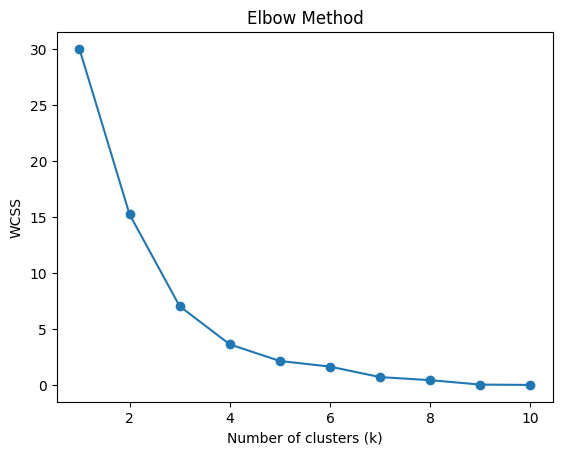

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [26]:
# Assume best k = 3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Add the cluster column to the original data
df['Cluster'] = clusters
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1–100),Cluster
0,1,19,15,39,2
1,2,21,15,81,0
2,3,20,16,6,2
3,4,23,18,77,0
4,5,31,30,40,2


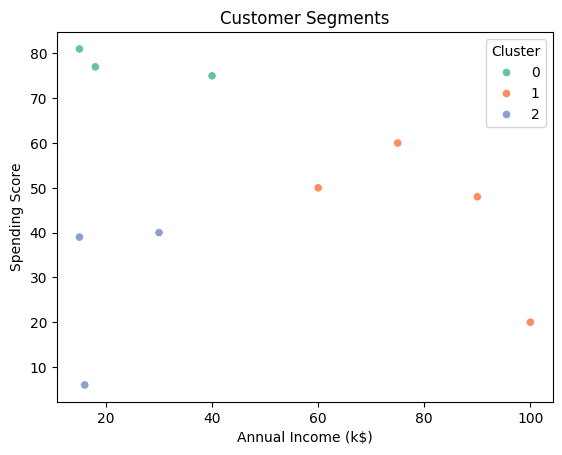

In [27]:
import seaborn as sns

sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1–100)'],
                hue=df['Cluster'], palette='Set2')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

In [28]:
df.groupby('Cluster').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1–100)
Cluster,,,,
0,4.0,22.000000,24.333333,77.666667
1,8.5,46.750000,81.250000,44.500000
2,3.0,23.333333,20.333333,28.333333
